In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

### Criar lista de arquivos e dicionário

In [2]:
arquivos = os.listdir("./dados_2002_21/")
estados = {}
print(arquivos)

['Tabela1.xls', 'Tabela10.xls', 'Tabela11.xls', 'Tabela12.xls', 'Tabela13.xls', 'Tabela14.xls', 'Tabela15.xls', 'Tabela16.xls', 'Tabela17.xls', 'Tabela18.xls', 'Tabela19.xls', 'Tabela2.xls', 'Tabela20.xls', 'Tabela21.xls', 'Tabela22.xls', 'Tabela23.xls', 'Tabela24.xls', 'Tabela25.xls', 'Tabela26.xls', 'Tabela27.xls', 'Tabela28.xls', 'Tabela29.xls', 'Tabela3.xls', 'Tabela30.xls', 'Tabela31.xls', 'Tabela32.xls', 'Tabela33.xls', 'Tabela4.xls', 'Tabela5.xls', 'Tabela6.xls', 'Tabela7.xls', 'Tabela8.xls', 'Tabela9.xls']


In [3]:
def extair_dados(arquivo, celula):
    number = re.findall(r'\d+', arquivo)
    df = pd.read_excel("./dados_2002_21/" + arquivo, sheet_name='Tabela' + number[0] + '.' + str(celula))
    df = df.loc[53:len(df)-2]
    categoria = df.iloc[2,0]
    local = df.iloc[1,0]
    dados_anuais = pd.DataFrame()
    dados_anuais[['Ano','Valor_ano_anterior','Valor_preço_anterior','Valor_corrente']] = df.iloc[4:,[0,1,3,5]].fillna(0)
    dados_anuais[['Categoria','Local']] = categoria,local
    #dados_anuais = dados_anuais.fillna(0)
    dados_anuais['Taxa de Crescimento'] = (dados_anuais['Valor_preço_anterior']/dados_anuais['Valor_ano_anterior'])-1
    
    #criar funções para tratar colunas novas
    return dados_anuais, categoria



In [4]:
def extrair_local(arquivo, celula):
    number = re.findall(r'\d+', arquivo)
    df = pd.read_excel("./dados_2002_21/" + arquivo, sheet_name='Tabela' + number[0] + '.' + str(celula))
    df = df.loc[53:len(df)-2]
    #categoria = df.iloc[2,0]
    local = df.iloc[1,0]
    return local

In [5]:
for i in arquivos:
    celula = 1
    local = extrair_local(i, celula)
    estados[local] = dict()
    #falta loopar pelas celulas
    for celula in range(1,17):
        dados_anuais, categoria = extair_dados(i, celula)
        estados[local][categoria] = dados_anuais

C:\Users\leoau\AppData\Local\Temp\ipykernel_9488\1470444807.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_anuais[['Ano','Valor_ano_anterior','Valor_preço_anterior','Valor_corrente']] = df.iloc[4:,[0,1,3,5]].fillna(0)
C:\Users\leoau\AppData\Local\Temp\ipykernel_9488\1470444807.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_anuais[['Ano','Valor_ano_anterior','Valor_preço_anterior','Valor_corrente']] = df.iloc[4:,[0,1,3,5]].fillna(0)
C:\Users\leoau\AppData\Local\Temp\ipykernel_9488\1470444807.py:8: FutureWarning: Downcasting object dt

In [6]:
for i in estados['Rio de Janeiro'].keys():
    print(i)

Total das Atividades
Agropecuária
Indústrias extrativas
Indústrias de Transformação
Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação
Construção
Comércio e reparação de veículos automotores e motocicletas
Transporte, armazenagem e correio
Alojamento e alimentação
Informação e comunicação
Atividades financeiras, de seguros e serviços relacionados
Atividades Imobiliárias
Atividades profissionais, científicas e técnicas, administrativas e serviços complementares
Administração, defesa, educação e saúde públicas e seguridade social
Educação e saúde privadas
Outras atividades de serviços


In [7]:
estados['Paraná']['Total das Atividades']

,Ano,Valor_ano_anterior,Valor_preço_anterior,Valor_corrente,Categoria,Local,Taxa de Crescimento
57,2002,0.000000,0.000000,76353.218039,Total das Atividades,Paraná,NaN
58,2003,76353.218039,79439.038710,96482.402510,Total das Atividades,Paraná,0.040415
59,2004,96482.402510,101431.316184,107706.240774,Total das Atividades,Paraná,0.051293
60,2005,107706.240774,108106.274237,110617.035441,Total das Atividades,Paraná,0.003714
61,2006,110617.035441,112664.346098,119448.899088,Total das Atividades,Paraná,0.018508
62,2007,119448.899088,127838.107245,143964.629399,Total das Atividades,Paraná,0.070233
63,2008,143964.629399,149257.564295,159424.943473,Total das Atividades,Paraná,0.036766
64,2009,159424.943473,156484.881654,171043.526686,Total das Atividades,Paraná,-0.018442
65,2010,171043.526686,187495.432188,192924.561102,Total das Atividades,Paraná,0.096185
66,2011,192924.561102,200681.807240,218851.112681,Total das Atividades,Paraná,0.040209


In [58]:
locais_importantes = ['Rio de Janeiro','Região Sudeste','São Paulo', 'Brasil']
atividades_importantes = ['Total das Atividades','Indústrias extrativas',
                          'Indústrias de Transformação',
                          'Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação',
                          'Construção']


for local in locais_importantes:
    df_completo = pd.DataFrame(columns=estados['Rio de Janeiro']['Indústrias de Transformação'].keys())
    df_completo = df_completo.set_index('Ano')
    df_completo.drop(labels=['Categoria','Local'],axis=1,inplace=True)
    for atividade in atividades_importantes:
        novo_df = pd.DataFrame(estados[local][atividade])
        novo_df = novo_df.set_index('Ano')
        novo_df.drop(labels=['Categoria','Local'],axis=1,inplace=True)
        novo_df =  novo_df.add_suffix("_"+atividade)
        df_completo = df_completo.join(novo_df, on='Ano', how='right')
    df_completo = df_completo.iloc[:,4:]
    df_completo.to_csv(local[0:5]+'.csv')

In [59]:
df_completo.head()

,Valor_ano_anterior_Total das Atividades,Valor_preço_anterior_Total das Atividades,Valor_corrente_Total das Atividades,Taxa de Crescimento_Total das Atividades,Valor_ano_anterior_Indústrias extrativas,Valor_preço_anterior_Indústrias extrativas,Valor_corrente_Indústrias extrativas,Taxa de Crescimento_Indústrias extrativas,Valor_ano_anterior_Indústrias de Transformação,Valor_preço_anterior_Indústrias de Transformação,Valor_corrente_Indústrias de Transformação,Taxa de Crescimento_Indústrias de Transformação,"Valor_ano_anterior_Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação","Valor_preço_anterior_Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação","Valor_corrente_Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação","Taxa de Crescimento_Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação",Valor_ano_anterior_Construção,Valor_preço_anterior_Construção,Valor_corrente_Construção,Taxa de Crescimento_Construção
Ano,,,,,,,,,,,,,,,,,,,,
2002,0.000000e+00,0.000,1.270215e+06,NaN,0.000,0.000,25740.851,NaN,0.000,0.000,183968.888,NaN,0.000,0.000,43218.251,NaN,0.000,0.000,81979.580,NaN
2003,1.270215e+06,1285796.439,1.470717e+06,0.012267,25740.851,26920.501,32325.019,0.045828,183968.888,188861.314,248256.967,0.026594,43218.251,44824.838,48108.409,0.037174,81979.580,74647.969,67878.148,-0.089432
2004,1.470717e+06,1553911.221,1.661982e+06,0.056567,32325.019,32173.305,40827.779,-0.004693,248256.967,270805.702,295611.236,0.090828,48108.409,50995.581,57367.478,0.060014,67878.148,75171.620,82056.725,0.107449
2005,1.661982e+06,1712074.247,1.842818e+06,0.030140,40827.779,43606.957,58023.110,0.068071,295611.236,302240.925,319906.854,0.022427,57367.478,59172.028,62185.539,0.031456,82056.725,80333.850,84570.741,-0.020996
2006,1.842818e+06,1910748.664,2.049290e+06,0.036862,58023.110,61808.860,72012.653,0.065246,319906.854,323853.220,339947.971,0.012336,62185.539,64758.405,66218.727,0.041374,84570.741,84793.349,89102.055,0.002632


<Axes: xlabel='Ano'>

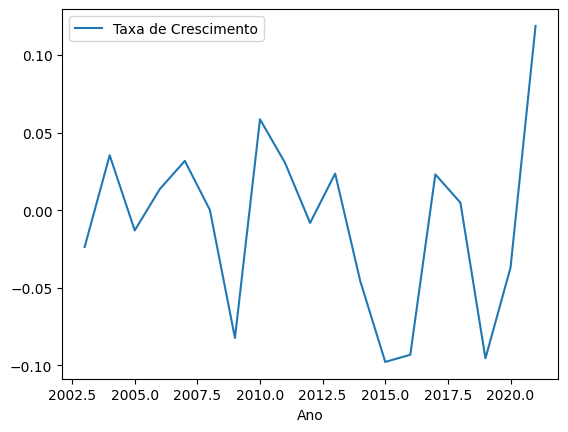

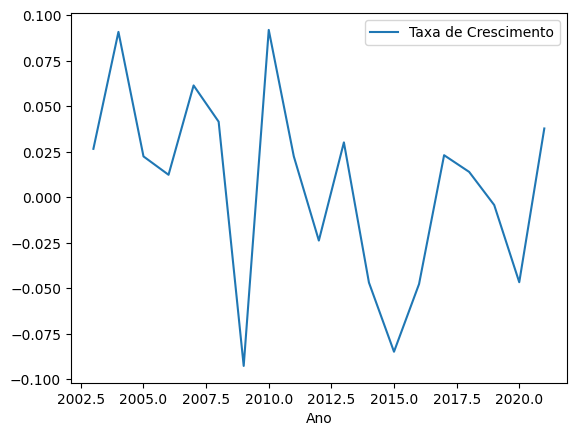

In [30]:
estados['Rio de Janeiro']['Indústrias de Transformação'][['Ano','Taxa de Crescimento']].plot(x='Ano')
#estados['São Paulo']['Indústrias de Transformação'][['Ano','Taxa de Crescimento']].plot(x='Ano')
estados['Brasil']['Indústrias de Transformação'][['Ano','Taxa de Crescimento']].plot(x='Ano')

In [34]:
prefixo = 1
recorte = 'Jornada_PPGSA_2024'
for local in locais_importantes:
    for atividade in atividades_importantes:
        estados[local][atividade].to_csv(recorte+'/'+str(prefixo)+'_'+str(local)+'_'+str(atividade)+'.csv')
    prefixo = prefixo + 1

In [35]:
tabelas_jornada = os.listdir("./"+recorte)
print(tabelas_jornada)

['1_Rio de Janeiro_Construção.csv', '1_Rio de Janeiro_Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação.csv', '1_Rio de Janeiro_Indústrias de Transformação.csv', '1_Rio de Janeiro_Indústrias extrativas.csv', '1_Rio de Janeiro_Total das Atividades.csv', '2_Região Sudeste_Construção.csv', '2_Região Sudeste_Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação.csv', '2_Região Sudeste_Indústrias de Transformação.csv', '2_Região Sudeste_Indústrias extrativas.csv', '2_Região Sudeste_Total das Atividades.csv', '3_São Paulo_Construção.csv', '3_São Paulo_Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação.csv', '3_São Paulo_Indústrias de Transformação.csv', '3_São Paulo_Indústrias extrativas.csv', '3_São Paulo_Total das Atividades.csv', '4_Brasil_Construção.csv', '4_Brasil_Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação.csv', '4_Brasil_Indústrias de Transformaç

In [60]:
tabela_final = pd.DataFrame(columns=estados['Rio de Janeiro']['Indústrias de Transformação'].keys())
for tabela in tabelas_jornada:
    df = pd.read_csv("./"+recorte+'/'+tabela, index_col=0)
    tabela_final = tabela_final.join(df,on='Ano',how='outer',rsuffix=str(tabela))

tabela_final.head()
#tabela_final.head()

,Ano,Valor_ano_anterior,Valor_preço_anterior,Valor_corrente,Categoria,Local,Taxa de Crescimento,Ano1_Rio de Janeiro_Construção.csv,Valor_ano_anterior1_Rio de Janeiro_Construção.csv,Valor_preço_anterior1_Rio de Janeiro_Construção.csv,...,Categoria4_Brasil_Indústrias extrativas.csv,Local4_Brasil_Indústrias extrativas.csv,Taxa de Crescimento4_Brasil_Indústrias extrativas.csv,Ano4_Brasil_Total das Atividades.csv,Valor_ano_anterior4_Brasil_Total das Atividades.csv,Valor_preço_anterior4_Brasil_Total das Atividades.csv,Valor_corrente4_Brasil_Total das Atividades.csv,Categoria4_Brasil_Total das Atividades.csv,Local4_Brasil_Total das Atividades.csv,Taxa de Crescimento4_Brasil_Total das Atividades.csv
57,57,NaN,NaN,NaN,NaN,NaN,NaN,2002,0.000000,0.000000,...,Indústrias extrativas,Brasil,NaN,2002,0.000000e+00,0.000,1.270215e+06,Total das Atividades,Brasil,NaN
58,58,NaN,NaN,NaN,NaN,NaN,NaN,2003,11581.665827,10887.638790,...,Indústrias extrativas,Brasil,0.045828,2003,1.270215e+06,1285796.439,1.470717e+06,Total das Atividades,Brasil,0.012267
59,59,NaN,NaN,NaN,NaN,NaN,NaN,2004,9320.982137,10140.230385,...,Indústrias extrativas,Brasil,-0.004693,2004,1.470717e+06,1553911.221,1.661982e+06,Total das Atividades,Brasil,0.056567
60,60,NaN,NaN,NaN,NaN,NaN,NaN,2005,10968.564223,10397.660691,...,Indústrias extrativas,Brasil,0.068071,2005,1.661982e+06,1712074.247,1.842818e+06,Total das Atividades,Brasil,0.030140
61,61,NaN,NaN,NaN,NaN,NaN,NaN,2006,10678.584565,10356.799776,...,Indústrias extrativas,Brasil,0.065246,2006,1.842818e+06,1910748.664,2.049290e+06,Total das Atividades,Brasil,0.036862
